# Analyse Exploratoire des Données

## La consommation d'énergie

### Analyse de la forme

### Analyse du fond 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv('../../raw_data/data_energy.csv',index_col="Date", parse_dates=True)

In [3]:
data.shape

(3417, 23)

In [4]:
data.columns

Index(['Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30'],
      dtype='object')

In [5]:
data.isna().sum()

Code INSEE région      0
Consommation (MW)      0
Thermique (MW)         0
Nucléaire (MW)         0
Eolien (MW)            0
Solaire (MW)           0
Hydraulique (MW)       0
Pompage (MW)           0
Bioénergies (MW)       0
Ech. physiques (MW)    0
Stockage batterie      0
Déstockage batterie    0
Eolien terrestre       0
Eolien offshore        0
TCO Thermique (%)      0
TCH Thermique (%)      0
TCO Nucléaire (%)      0
TCH Nucléaire (%)      0
TCO Eolien (%)         0
TCH Eolien (%)         0
TCO Solaire (%)        0
TCH Solaire (%)        0
Column 30              0
dtype: int64

In [6]:
pd.set_option('display.max_column', 23)
data.head()

Code INSEE région  Consommation (MW)  Thermique (MW)  \
Date                                                               
2013-01-01               4464      257058.278726         15175.0   
2013-01-02               4464      280064.000000         18369.0   
2013-01-03               4464      285526.000000         24755.0   
2013-01-04               4464      286799.000000         17085.0   
2013-01-05               4464      267848.000000         15479.0   

            Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
Date                                                                      
2013-01-01             0.0        372.0         405.0           61254.0   
2013-01-02             0.0       1404.0        2655.0           70681.0   
2013-01-03             0.0        626.0        2984.0           72282.0   
2013-01-04             0.0       1028.0        2570.0           68995.0   
2013-01-05             0.0       1557.0        2898.0           62143.0   

            Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
Date                                                              
2013-01-01          -4.0            1808.0             173268.0   
2013-01-02         -12.0            1717.0             185143.0   
2013-01-03           0.0            2357.0             182412.0   
2013-01-04           0.0            2988.0             194018.0   
2013-01-05           0.0            3051.0             182618.0   

            Stockage batterie  Déstockage batterie  Eolien terrestre  \
Date                                                                   
2013-01-01                0.0                  0.0               0.0   
2013-01-02                0.0                  0.0               0.0   
2013-01-03                0.0                  0.0               0.0   
2013-01-04                0.0                  0.0               0.0   
2013-01-05                0.0                  0.0               0.0   

            Eolien offshore  TCO Thermique (%)  TCH Thermique (%)  \
Date                                                                
2013-01-01              0.0                0.0                0.0   
2013-01-02              0.0                0.0                0.0   
2013-01-03              0.0                0.0                0.0   
2013-01-04              0.0                0.0                0.0   
2013-01-05              0.0                0.0                0.0   

            TCO Nucléaire (%)  TCH Nucléaire (%)  TCO Eolien (%)  \
Date                                                               
2013-01-01                0.0                0.0             0.0   
2013-01-02                0.0                0.0             0.0   
2013-01-03                0.0                0.0             0.0   
2013-01-04                0.0                0.0             0.0   
2013-01-05                0.0                0.0             0.0   

            TCH Eolien (%)  TCO Solaire (%)  TCH Solaire (%)  Column 30  
Date                                                                     
2013-01-01             0.0              0.0              0.0        0.0  
2013-01-02             0.0              0.0              0.0        0.0  
2013-01-03             0.0              0.0              0.0        0.0  
2013-01-04             0.0              0.0              0.0        0.0  
2013-01-05             0.0              0.0              0.0        0.0

In [7]:
addition = data['Thermique (MW)'] +  data['Eolien (MW)'] +  data['Solaire (MW)'] +  data['Hydraulique (MW)'] +  data['Pompage (MW)'] +  data['Bioénergies (MW)'] + data['Ech. physiques (MW)']
ecart = addition - data['Consommation (MW)']
print(ecart.min)
print(ecart.max)

<bound method NDFrame._add_numeric_operations.<locals>.min of Date
2013-01-01   -4780.278726
2013-01-02    -107.000000
2013-01-03    -110.000000
2013-01-04    -115.000000
2013-01-05    -102.000000
                 ...     
2022-05-11       6.000000
2022-05-12      16.000000
2022-05-13      15.000000
2022-05-14       5.000000
2022-05-15      -2.000000
Length: 3417, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.max of Date
2013-01-01   -4780.278726
2013-01-02    -107.000000
2013-01-03    -110.000000
2013-01-04    -115.000000
2013-01-05    -102.000000
                 ...     
2022-05-11       6.000000
2022-05-12      16.000000
2022-05-13      15.000000
2022-05-14       5.000000
2022-05-15      -2.000000
Length: 3417, dtype: float64>


In [8]:
data.loc[data["Nucléaire (MW)"]>0,:]

Empty DataFrame
Columns: [Code INSEE région, Consommation (MW), Thermique (MW), Nucléaire (MW), Eolien (MW), Solaire (MW), Hydraulique (MW), Pompage (MW), Bioénergies (MW), Ech. physiques (MW), Stockage batterie, Déstockage batterie, Eolien terrestre, Eolien offshore, TCO Thermique (%), TCH Thermique (%), TCO Nucléaire (%), TCH Nucléaire (%), TCO Eolien (%), TCH Eolien (%), TCO Solaire (%), TCH Solaire (%), Column 30]
Index: []

In [9]:
nucleaire = data.loc[data["TCO Nucléaire (%)"]>0,:]
pd.set_option('display.max_column', 23)
nucleaire.head()

Code INSEE région  Consommation (MW)  Thermique (MW)  \
Date                                                               
2021-01-01               4464           283815.0         35036.0   
2021-01-02               4464           294157.0         62666.0   
2021-01-03               4464           296424.0         30498.0   
2021-01-04               4464           320426.0         82025.0   
2021-01-05               4464           327553.0         92019.0   

            Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
Date                                                                      
2021-01-01             0.0        996.0        1751.0           29305.0   
2021-01-02             0.0       2000.0        1364.0           30977.0   
2021-01-03             0.0       1962.0        3043.0           30438.0   
2021-01-04             0.0        276.0         997.0           52963.0   
2021-01-05             0.0        423.0        3744.0           59492.0   

            Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
Date                                                              
2021-01-01        -765.0            5335.0             212159.0   
2021-01-02        -153.0            5326.0             191984.0   
2021-01-03        -459.0            4957.0             225996.0   
2021-01-04           0.0            5115.0             179054.0   
2021-01-05        -153.0            5204.0             166836.0   

            Stockage batterie  Déstockage batterie  Eolien terrestre  \
Date                                                                   
2021-01-01             581.44              1057.51               0.0   
2021-01-02             998.76              1891.51               0.0   
2021-01-03             475.82               920.53               0.0   
2021-01-04            1226.03              2475.83               0.0   
2021-01-05            1350.14              2777.53               0.0   

            Eolien offshore  TCO Thermique (%)  TCH Thermique (%)  \
Date                                                                
2021-01-01              0.0              16.68            1026.81   
2021-01-02              0.0              32.61            2061.87   
2021-01-03              0.0              32.40            2022.71   
2021-01-04              0.0               4.33             284.56   
2021-01-05              0.0               6.05             436.05   

            TCO Nucléaire (%)  TCH Nucléaire (%)  TCO Eolien (%)  \
Date                                                               
2021-01-01              28.72             121.93          497.00   
2021-01-02              20.76              95.00          505.68   
2021-01-03              47.10             211.90          492.34   
2021-01-04              13.94              69.43          777.35   
2021-01-05              53.23             260.71          863.85   

            TCH Eolien (%)  TCO Solaire (%)  TCH Solaire (%)  Column 30  
Date                                                                     
2021-01-01          895.37            90.50          1766.60        0.0  
2021-01-02          946.48            87.54          1763.55        0.0  
2021-01-03          929.97            80.75          1641.38        0.0  
2021-01-04         1618.20            77.16          1693.68        0.0  
2021-01-05         1817.68            76.62          1723.12        0.0

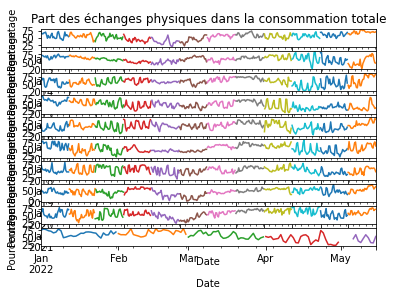

In [10]:
plt.rcParams["figure.figsize"]=[9,9]
plt.subplot(10, 1, 1)
plt.title("Part des échanges physiques dans la consommation totale")

Part_ech_phy =  (data['Ech. physiques (MW)'] / data['Consommation (MW)'])*100
Part_ech_phy['2013'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 2)
Part_ech_phy['2014'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 3)
Part_ech_phy['2015'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 4)
Part_ech_phy['2016'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 5)
Part_ech_phy['2017'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 6)
Part_ech_phy['2018'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 7)
Part_ech_phy['2019'].resample('M').plot( ylabel='Pourcentage')
plt.subplot(10, 1, 8)
Part_ech_phy['2020'].resample('M').plot( ylabel='Pourcentage')
plt.subplot(10, 1, 9)
Part_ech_phy['2021'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 10)
Part_ech_phy['2022'].resample('M').plot(ylabel='Pourcentage')
plt.show()

In [11]:
df = pd.DataFrame(nucleaire[[ 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore']])
print(df.sum(axis=1))

Date
2021-01-01    285455.95
2021-01-02    297054.27
2021-01-03    297831.35
2021-01-04    324131.86
2021-01-05    331692.67
                ...    
2022-02-24    258140.14
2022-02-25    258915.86
2022-02-26    251540.50
2022-02-27    256947.77
2022-02-28    269539.13
Length: 424, dtype: float64


In [12]:
df = pd.DataFrame(nucleaire[[ 'TCO Thermique (%)',
       'TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)']])
#'TCO Thermique (%)', 'TCH Thermique (%)','TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)','TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)'
print(df.sum(axis=1))

Date
2021-01-01    632.90
2021-01-02    646.59
2021-01-03    652.59
2021-01-04    872.78
2021-01-05    999.75
               ...  
2022-02-24    873.14
2022-02-25    983.54
2022-02-26    935.75
2022-02-27    766.93
2022-02-28    819.49
Length: 424, dtype: float64


In [13]:
#data['Consommation (MW)']
#data.loc['2020-01-25' : '2020-02-05','Consommation (MW)']
data.loc['2020-02-25' : '2020-03-05','Consommation (MW)']
#data.loc['2020-03-25' : '2020-04-05','Consommation (MW)']
#data.loc['2020-04-25' : '2020-05-05','Consommation (MW)']
#data.loc['2020-05-25' : '2020-06-05','Consommation (MW)']

Date
2020-02-25    235439.0
2020-02-26    250677.0
2020-02-27    276847.0
2020-02-28    261791.0
2020-02-29    258027.0
2020-03-01    241786.0
2020-03-02    261953.0
2020-03-03    267935.0
2020-03-04    270715.0
2020-03-05    272830.0
Name: Consommation (MW), dtype: float64

In [14]:
data.loc['2021-01' : '2021-06','TCO Nucléaire (%)']

Date
2021-01-01     28.72
2021-01-02     20.76
2021-01-03     47.10
2021-01-04     13.94
2021-01-05     53.23
               ...  
2021-06-26    431.54
2021-06-27    381.75
2021-06-28    323.42
2021-06-29    377.39
2021-06-30    423.06
Name: TCO Nucléaire (%), Length: 181, dtype: float64

In [15]:
data.dropna().count()


Code INSEE région      3417
Consommation (MW)      3417
Thermique (MW)         3417
Nucléaire (MW)         3417
Eolien (MW)            3417
Solaire (MW)           3417
Hydraulique (MW)       3417
Pompage (MW)           3417
Bioénergies (MW)       3417
Ech. physiques (MW)    3417
Stockage batterie      3417
Déstockage batterie    3417
Eolien terrestre       3417
Eolien offshore        3417
TCO Thermique (%)      3417
TCH Thermique (%)      3417
TCO Nucléaire (%)      3417
TCH Nucléaire (%)      3417
TCO Eolien (%)         3417
TCH Eolien (%)         3417
TCO Solaire (%)        3417
TCH Solaire (%)        3417
Column 30              3417
dtype: int64

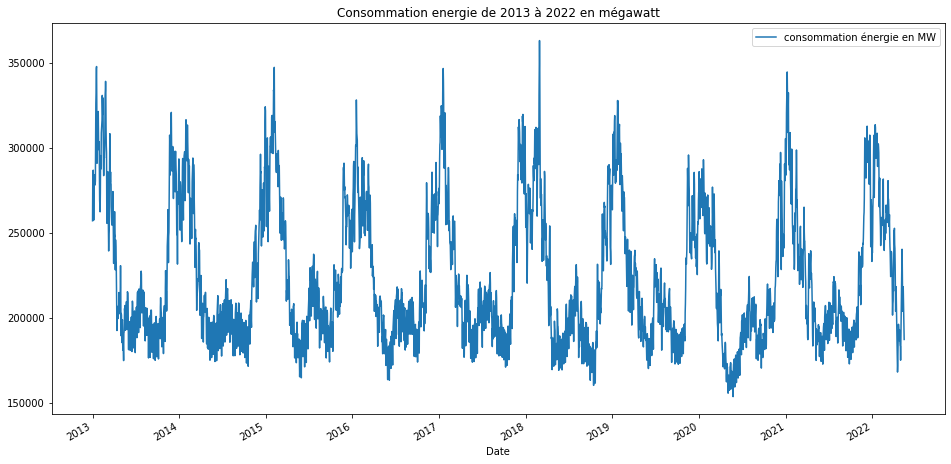

In [8]:
data['Consommation (MW)'].plot(figsize=(16,8), label='consommation énergie en MW', title='Consommation energie de 2013 à 2022 en mégawatt')
plt.legend()
plt.show()

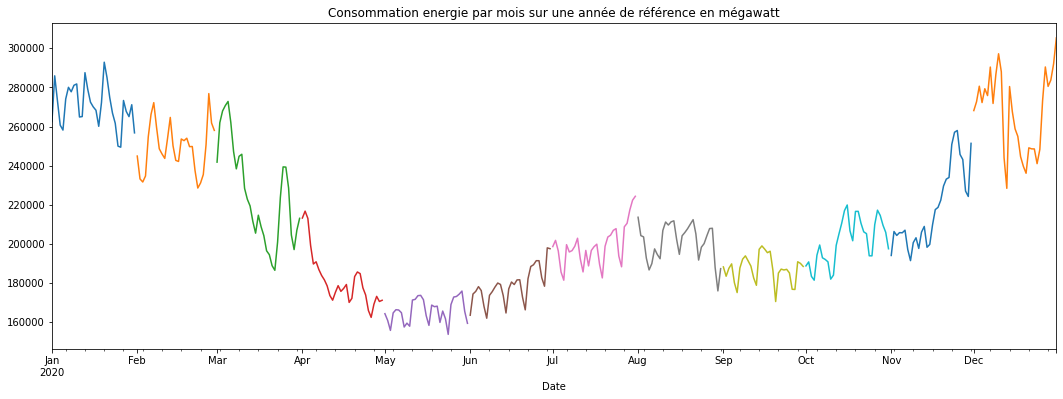

In [9]:
data['Consommation (MW)']['2020'].resample("M").plot(figsize=(18,6))
plt.title('Consommation energie par mois sur une année de référence en mégawatt')
#data.loc['2020-01' : '2020-02','Consommation (MW)'].resample("M").plot(figsize=(16,8))    #PLAGE DE REFERENCE
#data['Consommation (MW)']['2020'].hist(figsize=(18,6))                                    #HISTOGRAMME
plt.show()

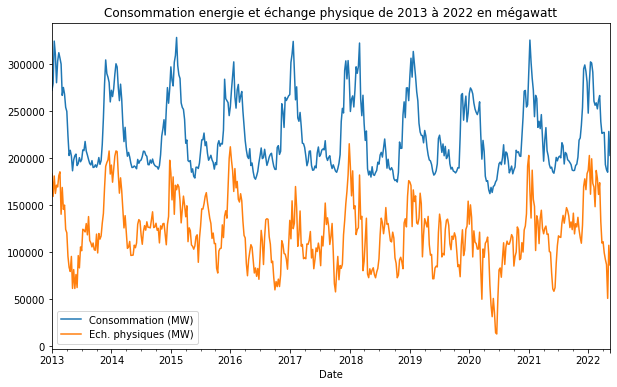

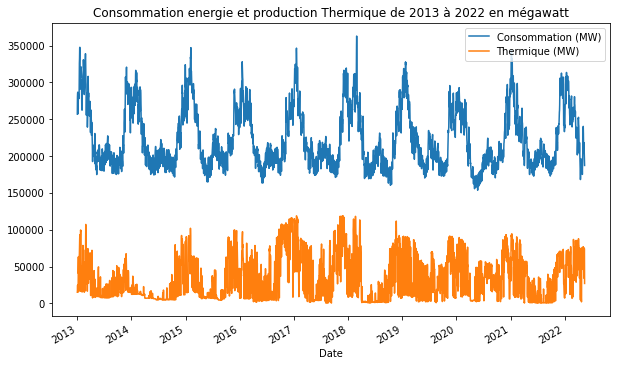

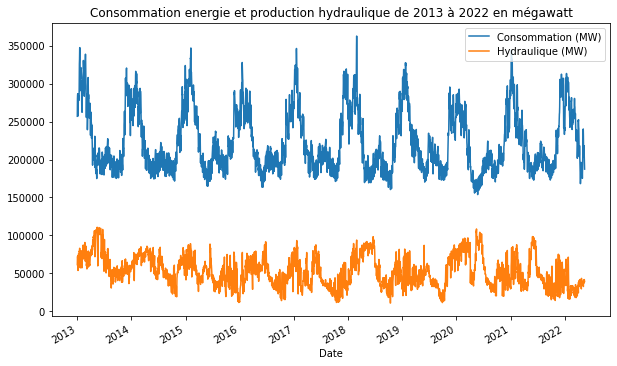

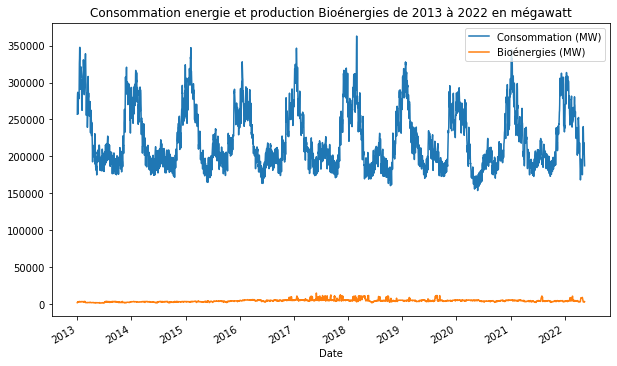

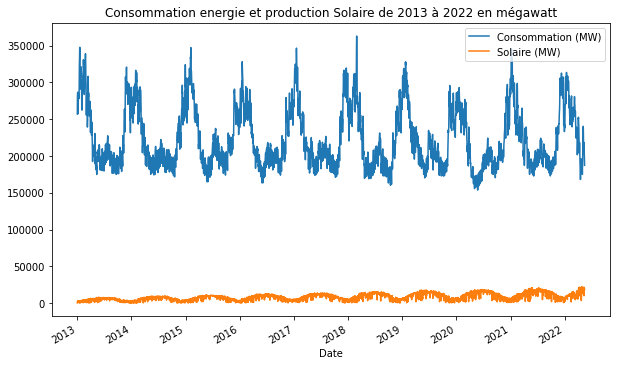

In [10]:
data[['Consommation (MW)','Ech. physiques (MW)']].resample('W').mean().plot(figsize=(10,6), title='Consommation energie et échange physique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)','Thermique (MW)']].plot(figsize=(10,6), title='Consommation energie et production Thermique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Hydraulique (MW)']].plot(figsize=(10,6), title='Consommation energie et production hydraulique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Bioénergies (MW)']].plot(figsize=(10,6), title='Consommation energie et production Bioénergies de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Solaire (MW)']].plot(figsize=(10,6), title='Consommation energie et production Solaire de 2013 à 2022 en mégawatt')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

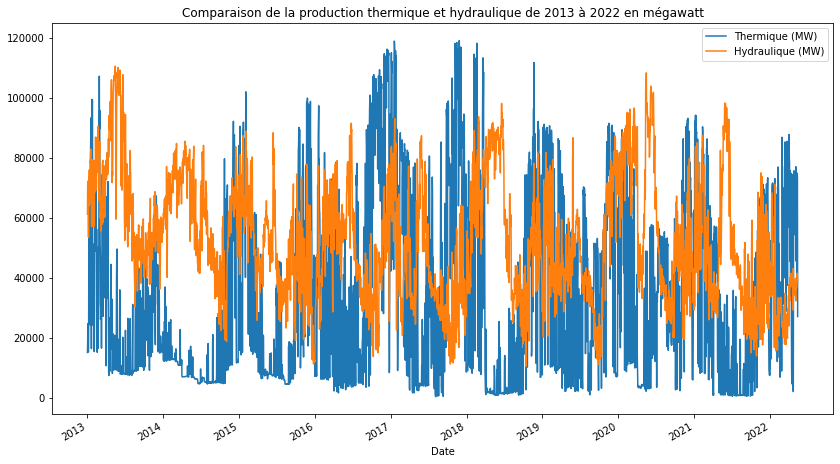

In [11]:
data[['Thermique (MW)','Hydraulique (MW)']].plot(figsize=(14,8), title='Comparaison de la production thermique et hydraulique de 2013 à 2022 en mégawatt')
plt.show

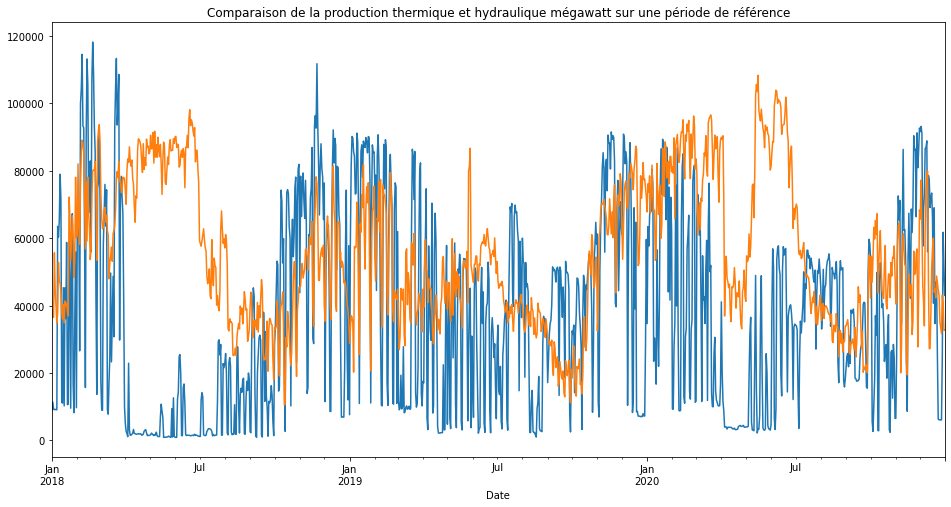

In [12]:
data.loc['2018' : '2020','Thermique (MW)'].plot(figsize=(16,8))
data.loc['2018' : '2020','Hydraulique (MW)'].plot(figsize=(16,8))

plt.title('Comparaison de la production thermique et hydraulique mégawatt sur une période de référence')
plt.show()

In [13]:
data[['Thermique (MW)','Hydraulique (MW)']].corr()

Thermique (MW)  Hydraulique (MW)
Thermique (MW)          1.000000         -0.019403
Hydraulique (MW)       -0.019403          1.000000

Représentations graphiques  des différentes productions d'énergie en %

<AxesSubplot:xlabel='Date'>

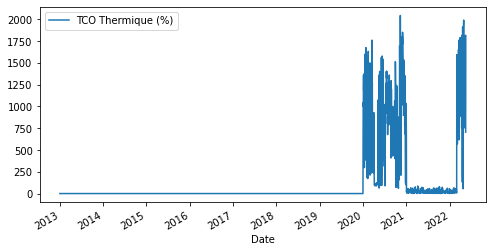

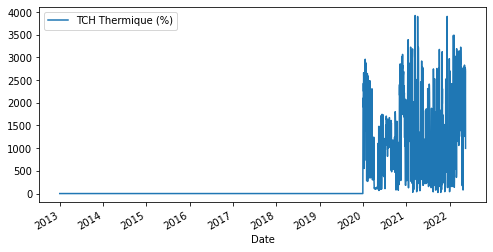

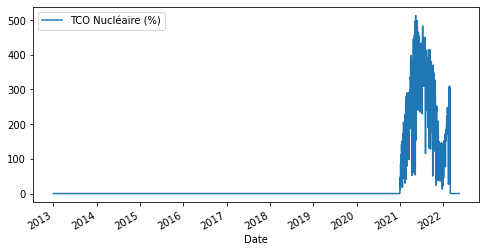

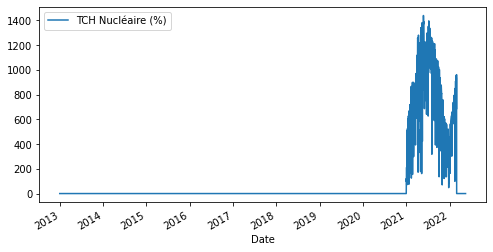

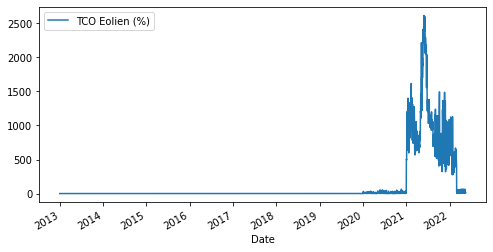

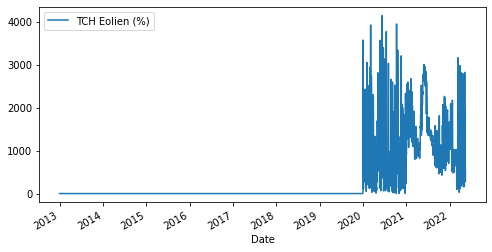

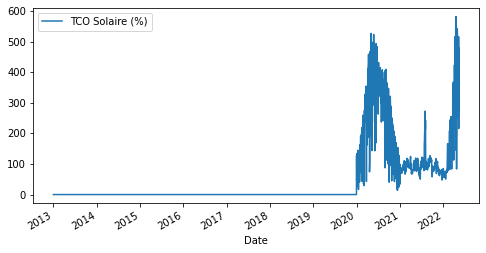

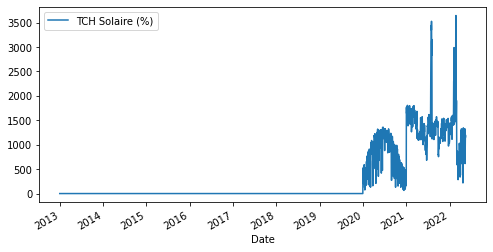

In [14]:
data[['TCO Thermique (%)']].plot(figsize=(8,4))
data[['TCH Thermique (%)']].plot(figsize=(8,4))
data[['TCO Nucléaire (%)']].plot(figsize=(8,4))
data[['TCH Nucléaire (%)']].plot(figsize=(8,4))
data[['TCO Eolien (%)']].plot(figsize=(8,4))
data[[ 'TCH Eolien (%)']].plot(figsize=(8,4))
data[['TCO Solaire (%)']].plot(figsize=(8,4))
data[['TCH Solaire (%)']].plot(figsize=(8,4))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3417 entries, 2013-01-01 to 2022-05-15
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code INSEE région    3417 non-null   int64  
 1   Consommation (MW)    3417 non-null   float64
 2   Thermique (MW)       3417 non-null   float64
 3   Nucléaire (MW)       3417 non-null   float64
 4   Eolien (MW)          3417 non-null   float64
 5   Solaire (MW)         3417 non-null   float64
 6   Hydraulique (MW)     3417 non-null   float64
 7   Pompage (MW)         3417 non-null   float64
 8   Bioénergies (MW)     3417 non-null   float64
 9   Ech. physiques (MW)  3417 non-null   float64
 10  Stockage batterie    3417 non-null   float64
 11  Déstockage batterie  3417 non-null   float64
 12  Eolien terrestre     3417 non-null   float64
 13  Eolien offshore      3417 non-null   float64
 14  TCO Thermique (%)    3417 non-null   float64
 15  TCH Thermique (%)   

In [16]:
data[['Consommation (MW)', 'Thermique (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)', 'Ech. physiques (MW)']].describe()

Consommation (MW)  Thermique (MW)  Solaire (MW)  Hydraulique (MW)  \
count        3417.000000     3417.000000   3417.000000       3417.000000   
mean       224989.378858    36692.696517   8434.472929      53316.463272   
std         39697.681331    30258.884003   4636.483295      20274.140384   
min        153691.000000      435.000000    167.000000      10509.000000   
25%        194272.000000     8834.000000   4812.000000      37700.000000   
50%        210106.000000    29805.000000   7912.000000      51324.000000   
75%        254321.000000    59800.000000  11754.000000      67790.000000   
max        362960.000000   119108.000000  22221.000000     110600.000000   

       Bioénergies (MW)  Ech. physiques (MW)  
count       3417.000000          3417.000000  
mean        4427.332163        121678.394791  
std         1799.098889         39026.161467  
min         1274.000000         -5578.000000  
25%         3300.000000         95557.000000  
50%         4241.000000        119559.000000  
75%         5064.000000        143947.000000  
max        14916.000000        249501.000000

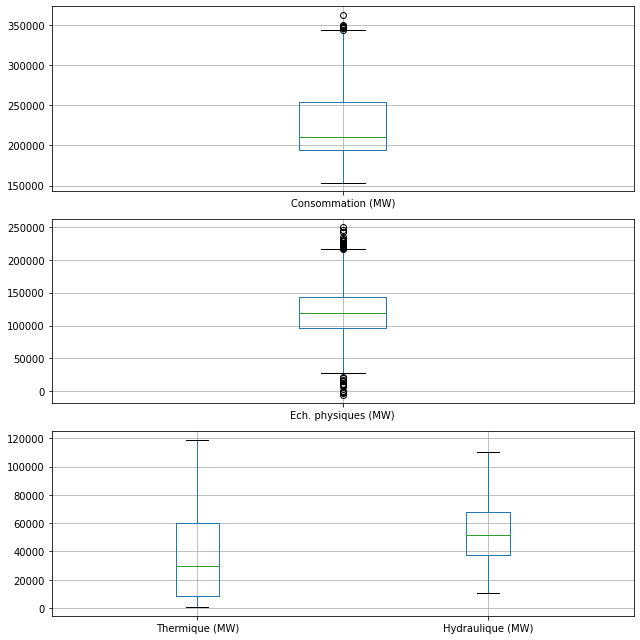

In [17]:
plt.rcParams["figure.figsize"]=[9,9]
plt.subplot(3, 1, 1)
data[['Consommation (MW)']].boxplot()
plt.subplot(3, 1, 2)
data[['Ech. physiques (MW)']].boxplot()
plt.subplot(3, 1, 3)
data[['Thermique (MW)', 'Hydraulique (MW)']].boxplot()
plt.tight_layout()

## Les prévisions météoroliques

### Analyse de la forme

### Analyse du fond 

In [18]:
df_weather_clean = pd.read_csv('../../raw_data/df_weather_clean.csv',index_col="Date", parse_dates=True)
df_weather_clean.head()

Unnamed: 0  YEAR  MONTH  DAY   T2M  T2MDEW  T2MWET    TS  \
Date                                                                   
2013-01-01           0  2013      1    1  7.30    6.40    6.85  7.08   
2013-01-02           1  2013      1    2  4.36    1.79    3.08  4.10   
2013-01-03           2  2013      1    3  5.46    0.91    3.19  3.78   
2013-01-04           3  2013      1    4  5.92    2.24    4.08  4.06   
2013-01-05           4  2013      1    5  6.64    2.37    4.50  4.85   

            T2M_RANGE  T2M_MAX  T2M_MIN  QV2M   RH2M  PRECTOTCORR     PS  \
Date                                                                       
2013-01-01       5.75     9.60     3.86  6.16  94.12         5.62  97.76   
2013-01-02       8.23    10.05     1.83  4.46  84.50         0.08  98.04   
2013-01-03      10.59    11.96     1.37  4.15  73.75         0.00  99.42   
2013-01-04      11.30    12.80     1.51  4.58  79.12         0.01  99.19   
2013-01-05      12.38    14.41     2.04  4.76  74.88         0.00  98.51   

            WS10M  WS50M  
Date                      
2013-01-01   3.23   5.29  
2013-01-02   4.65   6.87  
2013-01-03   2.33   3.35  
2013-01-04   2.50   3.72  
2013-01-05   3.25   5.05

In [19]:
df_weather_clean.shape

(3449, 17)

In [20]:
df_weather_clean.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS',
       'WS10M', 'WS50M'],
      dtype='object')

Définition des titres des colonnes:

In [21]:
df_weather_clean.isna().sum()

Unnamed: 0     0
YEAR           0
MONTH          0
DAY            0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
WS50M          0
dtype: int64

In [22]:
df_weather_clean[['T2M','TS']].plot(df_energy_weather['T2M'])
plt.show()

NameError: name 'df_energy_weather' is not defined

In [23]:
df_weather_clean[['T2M','TS']].head()

T2M    TS
Date                  
2013-01-01  7.30  7.08
2013-01-02  4.36  4.10
2013-01-03  5.46  3.78
2013-01-04  5.92  4.06
2013-01-05  6.64  4.85

In [24]:
df_weather_clean[['T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN']].corr()

T2M    T2MDEW    T2MWET        TS  T2M_RANGE   T2M_MAX  \
T2M        1.000000  0.861800  0.976914  0.996398   0.517803  0.983596   
T2MDEW     0.861800  1.000000  0.950268  0.848578   0.179100  0.793898   
T2MWET     0.976914  0.950268  1.000000  0.969135   0.393351  0.938247   
TS         0.996398  0.848578  0.969135  1.000000   0.526448  0.980761   
T2M_RANGE  0.517803  0.179100  0.393351  0.526448   1.000000  0.653058   
T2M_MAX    0.983596  0.793898  0.938247  0.980761   0.653058  1.000000   
T2M_MIN    0.977785  0.901362  0.979934  0.970206   0.341064  0.934634   

            T2M_MIN  
T2M        0.977785  
T2MDEW     0.901362  
T2MWET     0.979934  
TS         0.970206  
T2M_RANGE  0.341064  
T2M_MAX    0.934634  
T2M_MIN    1.000000

<AxesSubplot:>

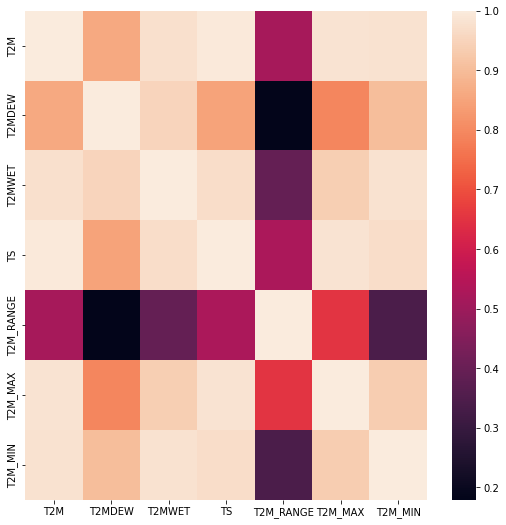

In [25]:
sns.heatmap(df_weather_clean[['T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN']].corr())


<AxesSubplot:>

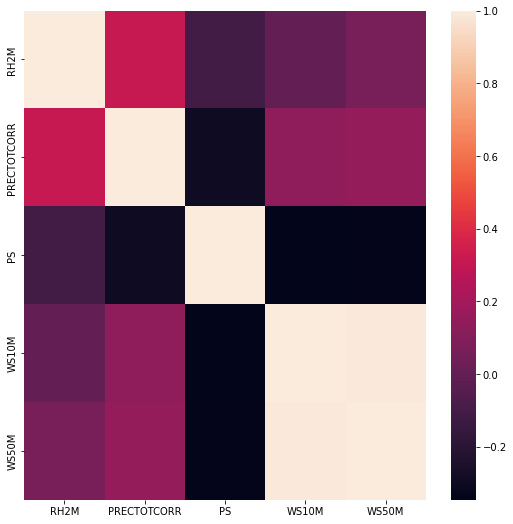

In [26]:
sns.heatmap(df_weather_clean[['RH2M', 'PRECTOTCORR', 'PS','WS10M', 'WS50M']].corr())

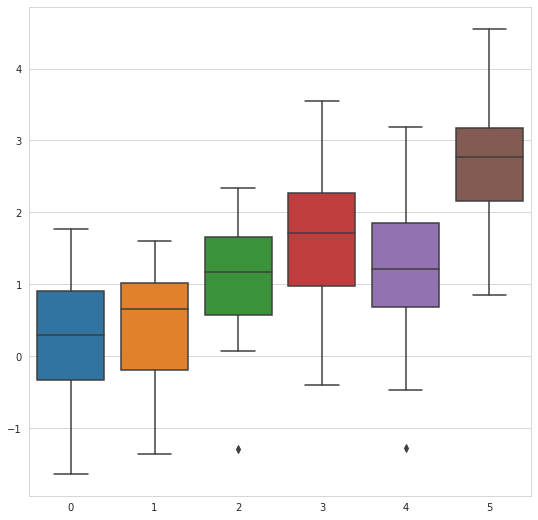

In [27]:
sns.set_style("whitegrid")
df_weather_clean = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=df_weather_clean);

## Etude la consommation selon la météo

### Analyse de la forme

### Analyse du fond 

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
df_energy_weather = pd.read_csv('../../raw_data/df_energy_weather.csv',index_col="Date", parse_dates=True)

In [25]:
df_energy_weather.head()

Unnamed: 0  Code INSEE région  Consommation (MW)  Thermique (MW)  \
Date                                                                           
2013-01-01           0               4464      257058.278726         15175.0   
2013-01-02           1               4464      280064.000000         18369.0   
2013-01-03           2               4464      285526.000000         24755.0   
2013-01-04           3               4464      286799.000000         17085.0   
2013-01-05           4               4464      267848.000000         15479.0   

            Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
Date                                                                      
2013-01-01             0.0        372.0         405.0           61254.0   
2013-01-02             0.0       1404.0        2655.0           70681.0   
2013-01-03             0.0        626.0        2984.0           72282.0   
2013-01-04             0.0       1028.0        2570.0           68995.0   
2013-01-05             0.0       1557.0        2898.0           62143.0   

            Pompage (MW)  Bioénergies (MW)  ...    TS  T2M_RANGE  T2M_MAX  \
Date                                        ...                             
2013-01-01          -4.0            1808.0  ...  7.08       5.75     9.60   
2013-01-02         -12.0            1717.0  ...  4.10       8.23    10.05   
2013-01-03           0.0            2357.0  ...  3.78      10.59    11.96   
2013-01-04           0.0            2988.0  ...  4.06      11.30    12.80   
2013-01-05           0.0            3051.0  ...  4.85      12.38    14.41   

            T2M_MIN  QV2M   RH2M  PRECTOTCORR     PS  WS10M  WS50M  
Date                                                                
2013-01-01     3.86  6.16  94.12         5.62  97.76   3.23   5.29  
2013-01-02     1.83  4.46  84.50         0.08  98.04   4.65   6.87  
2013-01-03     1.37  4.15  73.75         0.00  99.42   2.33   3.35  
2013-01-04     1.51  4.58  79.12         0.01  99.19   2.50   3.72  
2013-01-05     2.04  4.76  74.88         0.00  98.51   3.25   5.05  

[5 rows x 40 columns]

In [26]:
df_energy_weather["add"] = df_energy_weather['Thermique (MW)'] +  df_energy_weather['Eolien (MW)'] +  df_energy_weather['Solaire (MW)'] +  df_energy_weather['Hydraulique (MW)'] +  df_energy_weather['Pompage (MW)'] +  df_energy_weather['Bioénergies (MW)'] + df_energy_weather['Ech. physiques (MW)']
df_energy_weather['ecart'] = add - df_energy_weather['Consommation (MW)']
print(df_energy_weather['ecart'].min)
print(df_energy_weather['ecart'].max)

NameError: name 'add' is not defined

In [27]:
df_energy_weather.shape

(3417, 41)

In [28]:
df_energy_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3417 entries, 2013-01-01 to 2022-05-15
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3417 non-null   int64  
 1   Code INSEE région    3417 non-null   int64  
 2   Consommation (MW)    3417 non-null   float64
 3   Thermique (MW)       3417 non-null   float64
 4   Nucléaire (MW)       3417 non-null   float64
 5   Eolien (MW)          3417 non-null   float64
 6   Solaire (MW)         3417 non-null   float64
 7   Hydraulique (MW)     3417 non-null   float64
 8   Pompage (MW)         3417 non-null   float64
 9   Bioénergies (MW)     3417 non-null   float64
 10  Ech. physiques (MW)  3417 non-null   float64
 11  Stockage batterie    3417 non-null   float64
 12  Déstockage batterie  3417 non-null   float64
 13  Eolien terrestre     3417 non-null   float64
 14  Eolien offshore      3417 non-null   float64
 15  TCO Thermique (%)   

In [29]:
df_energy_weather.columns

Index(['Unnamed: 0', 'Code INSEE région', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'Column 30', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'add'],
      dtype='object')

In [30]:
df_energy_weather[['T2M', 'Consommation (MW)']].corr()

T2M  Consommation (MW)
T2M                1.000000          -0.749032
Consommation (MW) -0.749032           1.000000

<AxesSubplot:>

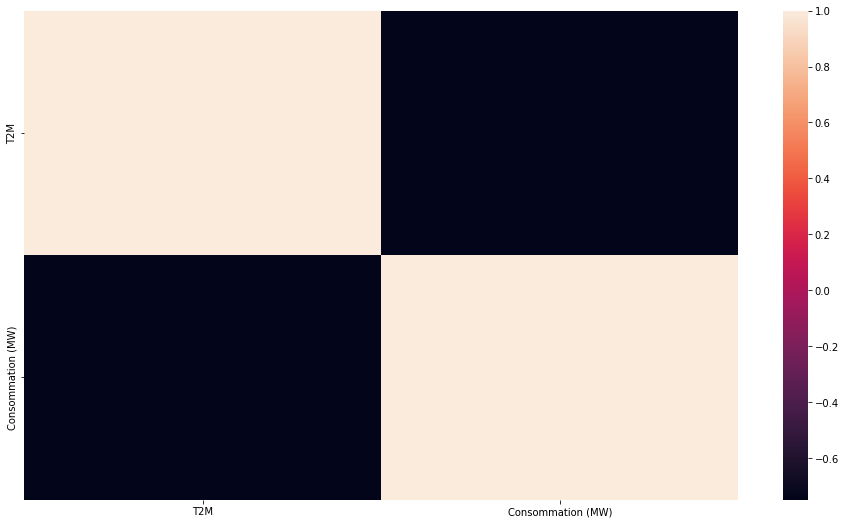

In [31]:
sns.heatmap(df_energy_weather[['T2M', 'Consommation (MW)']].corr())

<AxesSubplot:>

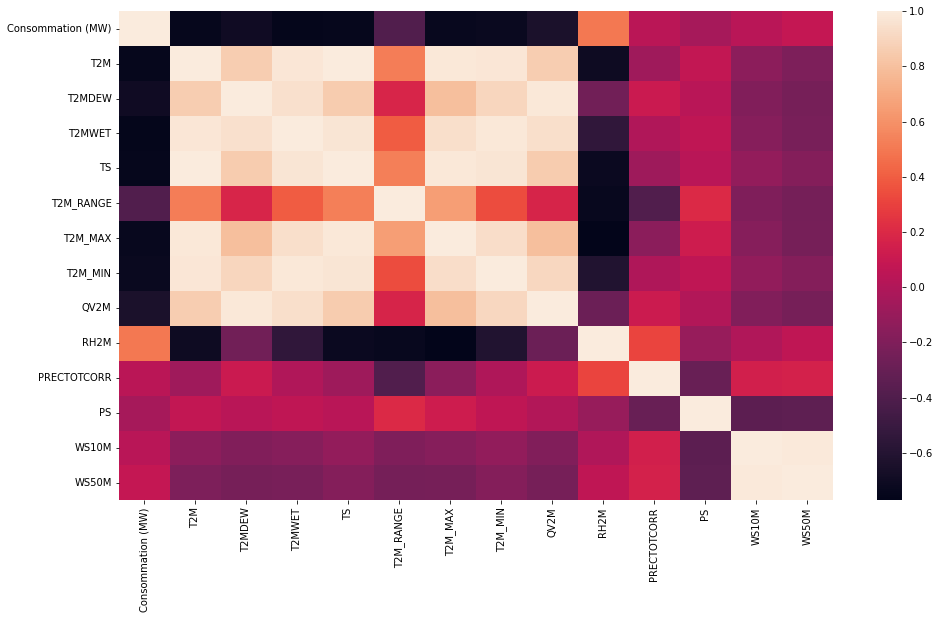

In [32]:
sns.heatmap(df_energy_weather[['Consommation (MW)', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M']].corr())

In [33]:
df_energy_weather[['Consommation (MW)', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M']].corr()

Consommation (MW)       T2M    T2MDEW    T2MWET        TS  \
Consommation (MW)           1.000000 -0.749032 -0.697855 -0.753918 -0.746417   
T2M                        -0.749032  1.000000  0.861183  0.976810  0.996378   
T2MDEW                     -0.697855  0.861183  1.000000  0.950042  0.847949   
T2MWET                     -0.753918  0.976810  0.950042  1.000000  0.969012   
TS                         -0.746417  0.996378  0.847949  0.969012  1.000000   
T2M_RANGE                  -0.396835  0.516551  0.176963  0.391745  0.525079   
T2M_MAX                    -0.735162  0.983530  0.792971  0.937965  0.980656   
T2M_MIN                    -0.725830  0.977809  0.900803  0.979869  0.970237   
QV2M                       -0.647666  0.861382  0.984816  0.943763  0.850834   
RH2M                        0.496280 -0.708916 -0.259605 -0.544667 -0.718610   
PRECTOTCORR                 0.038544 -0.072658  0.112493  0.002786 -0.074633   
PS                         -0.043998  0.074981  0.034759  0.060674  0.035631   
WS10M                       0.034159 -0.146309 -0.197655 -0.173110 -0.116964   
WS50M                       0.083534 -0.207918 -0.234775 -0.226578 -0.180179   

                   T2M_RANGE   T2M_MAX   T2M_MIN      QV2M      RH2M  \
Consommation (MW)  -0.396835 -0.735162 -0.725830 -0.647666  0.496280   
T2M                 0.516551  0.983530  0.977809  0.861382 -0.708916   
T2MDEW              0.176963  0.792971  0.900803  0.984816 -0.259605   
T2MWET              0.391745  0.937965  0.979869  0.943763 -0.544667   
TS                  0.525079  0.980656  0.970237  0.850834 -0.718610   
T2M_RANGE           1.000000  0.652247  0.339799  0.175922 -0.734163   
T2M_MAX             0.652247  1.000000  0.934536  0.794446 -0.772468   
T2M_MIN             0.339799  0.934536  1.000000  0.903122 -0.613764   
QV2M                0.175922  0.794446  0.903122  1.000000 -0.284706   
RH2M               -0.734163 -0.772468 -0.613764 -0.284706  1.000000   
PRECTOTCORR        -0.397232 -0.154567 -0.005268  0.117649  0.311975   
PS                  0.200325  0.123027  0.058607  0.006348 -0.107119   
WS10M              -0.199136 -0.174865 -0.123478 -0.195768 -0.003671   
WS50M              -0.243992 -0.238057 -0.180823 -0.235130  0.064096   

                   PRECTOTCORR        PS     WS10M     WS50M  
Consommation (MW)     0.038544 -0.043998  0.034159  0.083534  
T2M                  -0.072658  0.074981 -0.146309 -0.207918  
T2MDEW                0.112493  0.034759 -0.197655 -0.234775  
T2MWET                0.002786  0.060674 -0.173110 -0.226578  
TS                   -0.074633  0.035631 -0.116964 -0.180179  
T2M_RANGE            -0.397232  0.200325 -0.199136 -0.243992  
T2M_MAX              -0.154567  0.123027 -0.174865 -0.238057  
T2M_MIN              -0.005268  0.058607 -0.123478 -0.180823  
QV2M                  0.117649  0.006348 -0.195768 -0.235130  
RH2M                  0.311975 -0.107119 -0.003671  0.064096  
PRECTOTCORR           1.000000 -0.295488  0.141842  0.155421  
PS                   -0.295488  1.000000 -0.346961 -0.339039  
WS10M                 0.141842 -0.346961  1.000000  0.991545  
WS50M                 0.155421 -0.339039  0.991545  1.000000

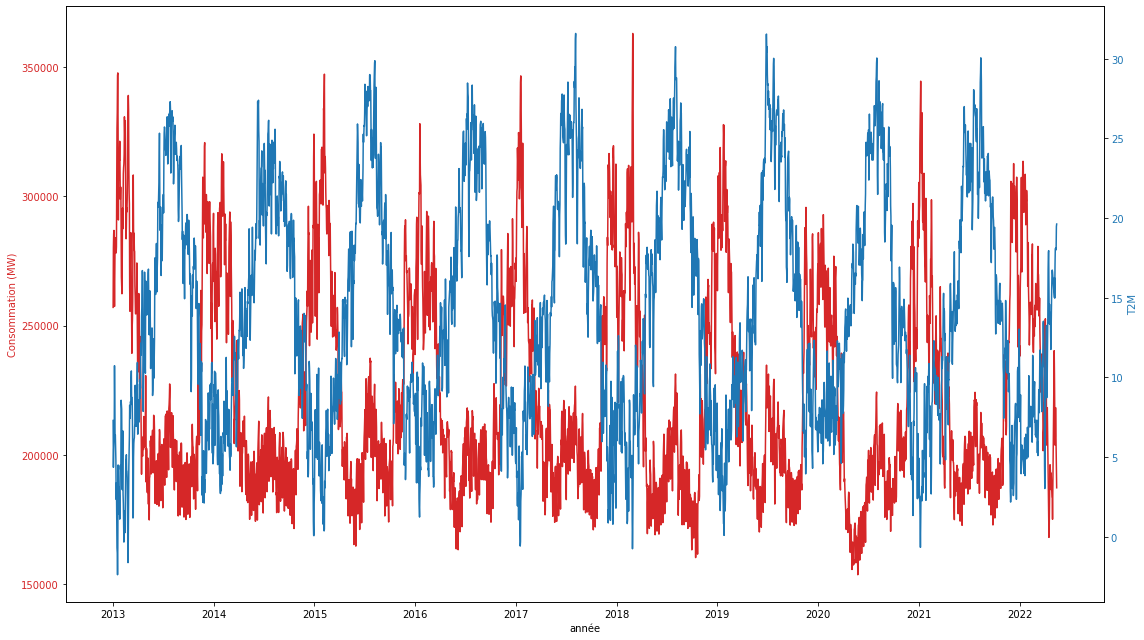

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
t = np.arange(2018, 2020)
data1 = df_energy_weather['Consommation (MW)']
data2 = df_energy_weather['T2M']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('T2M', color=color)  # we already handled the x-label with ax1
ax2.plot( data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [35]:
df_energy_weather['Consommation (MW)'].shape

(3417,)

In [36]:
df_energy_weather['T2M'].shape

(3417,)

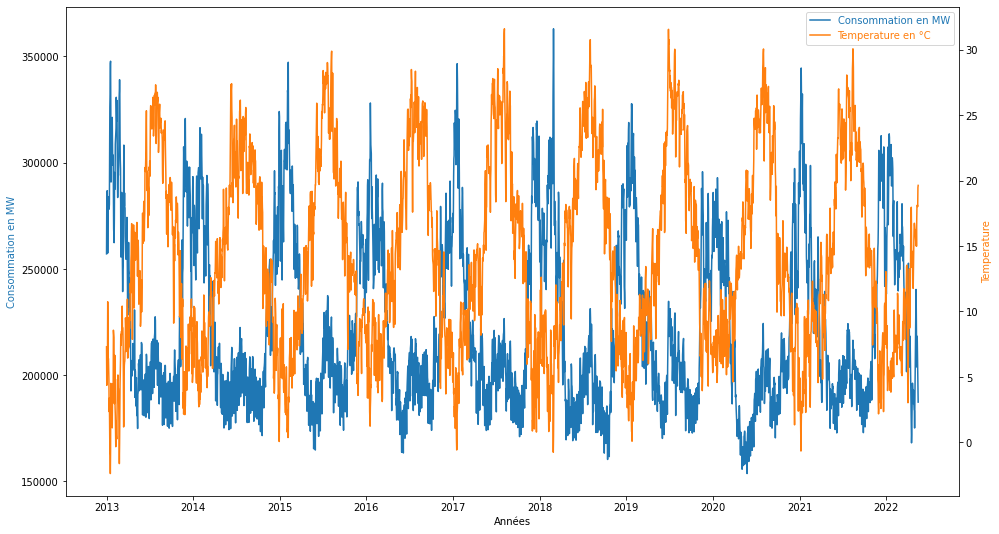

In [37]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

#plt.figure(figsize=(18,6))
t = np.arange(2018, 2020)

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Années")
#host.set_xlim(2018, 2020)
#host.set_xlim(2018, 2020)
#ax.set_xticks(df_energy_weather['Date'])
host.set_ylabel("Consommation en MW")
par.set_ylabel("Temperature")

p1, = host.plot(df_energy_weather['Consommation (MW)'], label="Consommation en MW")
p2, = par.plot(df_energy_weather['T2M'], label="Temperature en °C")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()

In [38]:
np.unique(df_energy_weather['Consommation (MW)']) 

array([153691., 155728., 157455., ..., 349322., 350492., 362960.])

In [39]:
np.unique(df_energy_weather['T2M'])

array([-2.38, -1.62, -1.01, ..., 31.52, 31.55, 31.59])

In [40]:
ener = np.array(df_energy_weather['Consommation (MW)'])

In [41]:
ener.size

3417

In [42]:
temp = np.array(df_energy_weather['T2M'])

In [43]:
temp.size

3417

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
t = df_energy_weather['Date']
data1 = ener
data2 = temp

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('T2M', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

KeyError: 'Date'

# GRAPHIQUES POUR PRESENTATION

Consommation energie de 2013 à 2022 en mégawatt

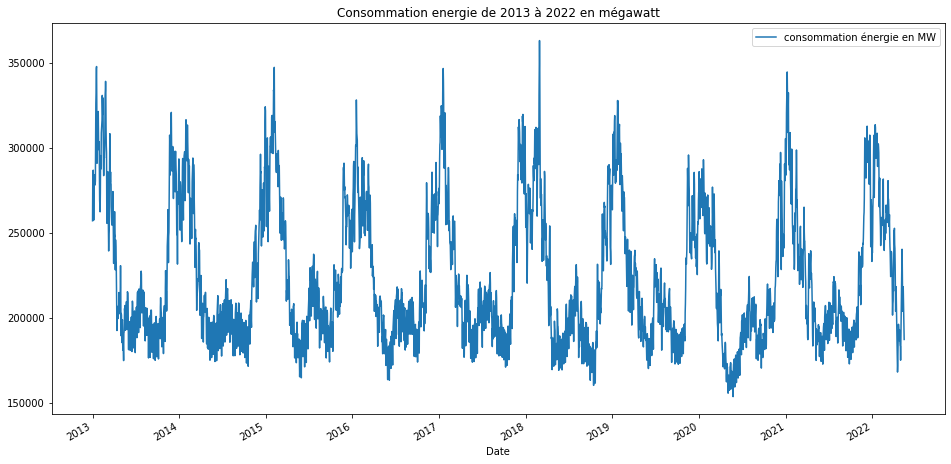

In [45]:
df_energy_weather['Consommation (MW)'].plot(figsize=(16,8), label='consommation énergie en MW', title='Consommation energie de 2013 à 2022 en mégawatt')
plt.legend()
plt.show()

Consommation energie par mois sur une année de référence en mégawatt

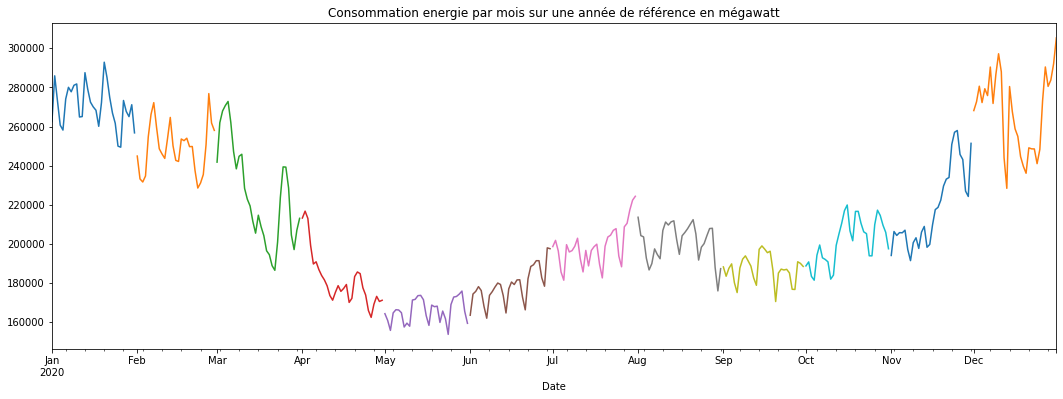

In [46]:
df_energy_weather['Consommation (MW)']['2020'].resample("M").plot(figsize=(18,6))
plt.title('Consommation energie par mois sur une année de référence en mégawatt')
#df_energy_weather.loc['2020-01' : '2020-02','Consommation (MW)'].resample("M").plot(figsize=(16,8))    #PLAGE DE REFERENCE
#df_energy_weather['Consommation (MW)']['2020'].hist(figsize=(18,6))                                    #HISTOGRAMME
plt.show()

Part de la production dans la consommation d'énergie

In [47]:
échange_physique = (df_energy_weather['Ech. physiques (MW)'] / df_energy_weather['Consommation (MW)'])*100
Thermique = (df_energy_weather['Thermique (MW)'] / df_energy_weather['Consommation (MW)'])*100
Hydraulique = (df_energy_weather['Hydraulique (MW)'] / df_energy_weather['Consommation (MW)'])*100
Eolien = (df_energy_weather['Eolien (MW)'] / df_energy_weather['Consommation (MW)'])*100
Solaire = (df_energy_weather['Solaire (MW)'] / df_energy_weather['Consommation (MW)'])*100
Bioénergies = (df_energy_weather['Bioénergies (MW)'] / df_energy_weather['Consommation (MW)'])*100
Nucléaire = (df_energy_weather['Nucléaire (MW)'] / df_energy_weather['Consommation (MW)'])*100
Pompage = (df_energy_weather['Pompage (MW)'] / df_energy_weather['Consommation (MW)'])*100

In [48]:
Thermique['2021'].sum()            # 4595
échange_physique['2021'].sum()     # 21017
Hydraulique['2021'].sum()          # 8049
Solaire['2021'].sum()              # 2029
Bioénergies['2021'].sum()          # 702

702.3742836960218

In [49]:
import plotly.express as px
RPA = np.array([4595,21017,8049,2029,702])
df = px.data.tips()
fig = px.pie(df,values=RPA,names=('Thermique (MW)','Ech. physiques (MW)','Hydraulique (MW)', 'Solaire (MW)','Bioénergies (MW)'),title='Répartition de la production énergétique en 2021')
fig.show()
#peut-etre choisir un an

In [50]:
df_energy_weather.columns

Index(['Unnamed: 0', 'Code INSEE région', 'Consommation (MW)',
       'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'Column 30', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'add'],
      dtype='object')

In [72]:
import plotly.express as px
x= df_energy_weather[['Consommation (MW)']]
fig = px.line(x,title='Evolution de la consommation énergétique de 2013 à 2022')
fig.show()

In [52]:
#h= df_energy_weather[['Hydraulique (MW)']].loc["2016"].resample('W').mean()                # de fev à juin 2018
h= df_energy_weather[['Hydraulique (MW)']]["2017":"2018"].resample('M').mean()                  # de fev. à juin 2020 - réduction production pendant 1er confinement
#h= df_energy_weather[['Hydraulique (MW)']]                                      # de 2013 à 2022
fig = px.line(h, title='Production hydraulique par rapport à la consommation totale')
fig.show()

#prendre deux ans

In [91]:
E= df_energy_weather[['Eolien (MW)', 'WS10M', 'WS50M']].resample('M').mean()
fig = px.line(E)
fig.show()
#possibilité de mettre le vent???

In [54]:
df_energy_weather[['Eolien (MW)']].max()

Eolien (MW)    3806.0
dtype: float64

Evolution production thermique par rapport à la production d'énergie

In [75]:

T=df_energy_weather[['Consommation (MW)','Thermique (MW)']]['2018':'2021'].resample('M').mean()
fig = px.line(T,title='Evolution de la production thermique par rapport à la consommation totale de 2018 à 2021')
fig.show()
#montrer la consommation globale.
#on soutien notre conso gràce à la production du thermique

In [56]:
df_energy_weather[['Consommation (MW)','Thermique (MW)']].corr()

Consommation (MW)  Thermique (MW)
Consommation (MW)           1.000000        0.501087
Thermique (MW)              0.501087        1.000000

Production "verte"

In [57]:
production_verte = Eolien + Bioénergies + Solaire
production_verte.sum()

21663.43228216932

In [58]:
PV=production_verte.resample('M').mean()
fig = px.line(PV)
fig.show()

In [77]:
PVD=df_energy_weather[['Solaire (MW)','Bioénergies (MW)','Eolien (MW)']].resample('3M').mean()

fig = px.line(PVD,title='Comparaison des productions "éco-responsables" depuis 2013')
fig.show()


In [80]:
fig = px.line(df_energy_weather[['Consommation (MW)','Ech. physiques (MW)']]['2018':'2020'].resample('M').mean(),title='Evolution des échanges physiques par rapport à nos besoins en énergie entre 2018 et 2020')
fig.show()
# avec conso

In [89]:
ech_th=df_energy_weather[['Ech. physiques (MW)','Thermique (MW)','Hydraulique (MW)' ]]['2020':'2022'].resample('M').mean()

fig = px.line(ech_th,title='Evolution de la production thermique et hydraulique par rapport aux échanges physiques entre 2020 et 2022')
fig.show()
#tester 2020 21

In [92]:
#Plotly FigureWidget Overview in Python
#https://plotly.com/python/figurewidget/

In [108]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

x = df_energy_weather[['Date']]
# Add traces
fig.add_trace(
    go.Scatter(x,y=df_energy_weather[['Eolien (MW)']], name="Production éolien"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x,y=df_energy_weather[['WS10M']], name="Force du vent"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

KeyError: "None of [Index(['Date'], dtype='object')] are in the [columns]"

In [ ]:
#E= df_energy_weather[['Eolien (MW)', 'WS10M', 'WS50M']].resample('M').mean()
#fig = px.line(E)
#fig.show()
#possibilité de mettre le vent???